In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random 
from pprint import pprint

In [103]:
df=pd.read_csv('iris.csv')

df=df.rename(columns={"species":"label"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [104]:
df.info()  # to check if null is present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Train-Test-Split

In [105]:
def train_test_split(df,test_size):
    ## to check if test_size is passed as proportion or a number
    if isinstance(test_size, float):
        test_size = round(len(df)*test_size) 
    ##
    indices=df.index.tolist()
    test_indices=random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df,test_df

In [106]:
random.seed(0)
train_df, test_df = train_test_split(df , test_size=20)
print(test_df)

     sepal_length  sepal_width  petal_length  petal_width       label
98            5.1          2.5           3.0          1.1  versicolor
107           7.3          2.9           6.3          1.8   virginica
10            5.4          3.7           1.5          0.2      setosa
66            5.6          3.0           4.5          1.5  versicolor
130           7.4          2.8           6.1          1.9   virginica
124           6.7          3.3           5.7          2.1   virginica
103           6.3          2.9           5.6          1.8   virginica
77            6.7          3.0           5.0          1.7  versicolor
122           7.7          2.8           6.7          2.0   virginica
91            6.1          3.0           4.6          1.4  versicolor
149           5.9          3.0           5.1          1.8   virginica
55            5.7          2.8           4.5          1.3  versicolor
129           7.2          3.0           5.8          1.6   virginica
35            5.0   

# Helper functions

In [107]:
data = df.values

# data Pure?

In [53]:
def check_purity( data ):
    label_column = data[:,-1]
    unique_classes = np.unique(label_column)
    if len(unique_classes) == 1:
        return True
    else:
        return False

In [91]:
#check_purity(train_df[train_df.petal_width <0.8].values)

True

In [98]:
#train_df[train_df. petal_width > 0.8].values[-1]  # function will take only the last column in label_column

array([6.2, 3.4, 5.4, 2.3, 'virginica'], dtype=object)

## Create Leaf

In [54]:
def create_leaf(data, ml_task):  # retrurn the class of label by taking np dataset
    label_column = data[:,-1]
    if ml_task == "regression":
        leaf = np.mean(label_column)
        
    else:     # classification
        # here we have to incluse 2 functionalities
        # if datapoints are less than 5 points then return the class that appears most often
        # if labels within dataset is pure return leaf node
        unique_classes, count_unique_classes = np.unique(label_column, return_counts=True)
        index = count_unique_classes.argmax()
        leaf = unique_classes[index]
    return leaf


In [16]:
create_leaf(data, ml_task="regression")

4504.3488372093025

In [121]:
#classify_data(train_df[(train_df.petal_width >0.8) & (train_df.petal_width < 2) ].values)

'versicolor'

# Potential splits

In [55]:
def get_potential_splits(data):
    potential_splits={}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):
        potential_splits[column_index] = [] 
        values = data[: , column_index]
        unique_values = np.unique(values)
        potential_splits[column_index] = unique_values
    return potential_splits

In [140]:
potential_splits = get_potential_splits(train_df.values)
potential_splits

{0: array([1, 2, 3], dtype=object),
 1: array(['female', 'male'], dtype=object),
 2: [0.545,
  0.71,
  0.79,
  0.875,
  0.96,
  1.5,
  2.5,
  3.5,
  4.5,
  5.5,
  6.5,
  7.5,
  8.5,
  9.5,
  10.5,
  11.5,
  12.5,
  13.5,
  14.25,
  14.75,
  15.5,
  16.5,
  17.5,
  18.5,
  19.5,
  20.25,
  20.75,
  21.5,
  22.5,
  23.25,
  23.75,
  24.25,
  24.75,
  25.5,
  26.5,
  27.5,
  28.25,
  28.75,
  29.5,
  30.25,
  30.75,
  31.5,
  32.25,
  32.75,
  33.5,
  34.25,
  34.75,
  35.5,
  36.25,
  36.75,
  37.5,
  38.5,
  39.5,
  40.25,
  40.75,
  41.5,
  42.5,
  43.5,
  44.5,
  45.25,
  45.75,
  46.5,
  47.5,
  48.5,
  49.5,
  50.5,
  51.5,
  52.5,
  53.5,
  54.5,
  55.25,
  55.75,
  56.5,
  57.5,
  58.5,
  59.5,
  60.5,
  61.5,
  62.5,
  63.5,
  64.5,
  67.5,
  70.25,
  70.75,
  72.5,
  77.0],
 3: array([0, 1, 2, 3, 4, 5, 8], dtype=object),
 4: array([0, 1, 2, 3, 4, 5, 6], dtype=object),
 5: [2.00625,
  4.50625,
  5.61875,
  6.3375,
  6.46665,
  6.6229,
  6.80415,
  6.90415,
  6.9625,
  7.0104,
  7

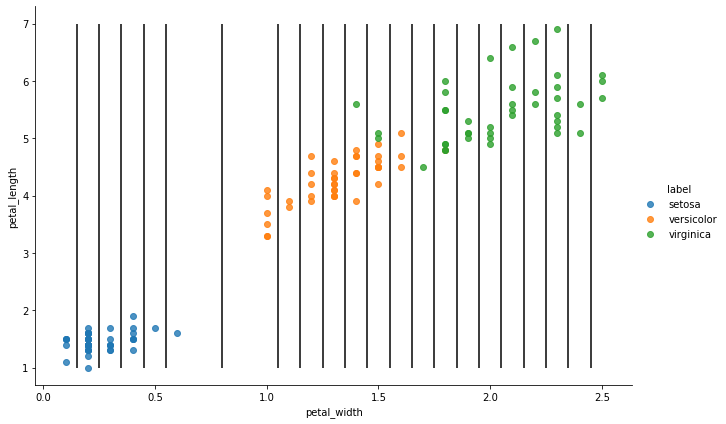

In [26]:
sns.lmplot(data= train_df, x="petal_width", y="petal_length",hue="label", aspect=1.5, fit_reg=False , height=6)
plt.vlines(x=potential_splits[3], ymin=1 , ymax=7)
#plt.hlines(y=potential_splits[2], xmin=0.0, xmax=2.5)

## Split data

In [56]:
def split_data(data, split_column , split_value):
    split_column_values=data[:, split_column]
    
    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values<= split_value]
        data_above= data[split_column_values >split_value]
    else:
        data_below = data[split_column_values == split_value]
        data_above= data[split_column_values  != split_value]
        
    return data_below, data_above

In [93]:
split_column=3
split_value=0.8

In [94]:
data_below, data_above = split_data(data, split_column, split_value)
data_below

array([], shape=(0, 5), dtype=object)

In [95]:
plotting_values = pd.DataFrame(data_below,columns=df.columns)
sns.lmplot(data= plotting_values, x="petal_width" ,y="petal_length", fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=split_value, ymin=1.0, ymax=7)
plt.xlim(0, 2.6)

AssertionError: Number of manager items must equal union of block items
# manager items: 8, # tot_items: 5

In [106]:
## testing for categorical data
print(df.head())
data_below, data_above = split_data(train_df.values, split_column=1, split_value="male")
np.unique(data_above[:,1])

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  label
0       3    male  22.0      1      0   7.2500        S      0
1       1  female  38.0      1      0  71.2833        C      1
2       3  female  26.0      0      0   7.9250        S      1
3       1  female  35.0      1      0  53.1000        S      1
4       3    male  35.0      0      0   8.0500        S      0


array(['female'], dtype=object)

## Determine best split

In [57]:
def calculate_mse(data):
    actual_values= label_column = data[:, -1]
    if len(data)==0 :
        mse = 0
    else:
        prediction = np.mean(actual_values)
        mse = np.mean((actual_values - prediction)**2)
    return mse

In [31]:
calculate_mse(data)

3747654.435084148

In [58]:
def calculate_entropy(data):
    label_column = data[:, -1]
    _,counts = np.unique(label_column,return_counts=True)  # count is vector
    
    probabilities = counts/ counts.sum() # count is vector
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

In [37]:
#calculate_entropy(data_above)

In [59]:
def calculate_overall_metric(data_below, data_above, metric_function):
    n_data_points = len(data_below) + len(data_above)
    p_data_below = len(data_below)/ n_data_points
    p_data_above = len(data_above) / n_data_points
    
    overall_metric = (p_data_below * metric_function(data_below)) + (p_data_above * metric_function(data_above))
    return overall_metric
 

In [43]:
calculate_overall_metric(data, data, metric_function=calculate_entropy)

9.417968362026324

In [44]:
calculate_overall_metric(data, data, metric_function=calculate_mse)

3747654.435084148

In [60]:
def determine_best_split(data, potential_splits, ml_task):
    first_iteration = True
    
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            
            data_below, data_above = split_data( data, split_column=column_index, split_value=value)
            if ml_task == "regression":
                current_overall_metric = calculate_overall_metric(data_below, data_above,
                                                                  metric_function = calculate_mse)
            else:
                current_overall_metric = calculate_overall_metric(data_below, data_above,
                                                                  metric_function = calculate_entropy)
                
            if first_iteration or current_overall_metric <= best_overall_metric:
                first_iteration = False
                best_overall_metric = current_overall_metric
                best_split_column = column_index
                best_split_value = value

    
    
    return best_split_column, best_split_value

In [47]:
potential_splits=get_potential_splits(data)


In [48]:
determine_best_split(data, potential_splits)

(3, 0.8)

# Decision Tree Algorithm

## representation of Decision tree

fundamental unit of a tree is dictionary with yes/no answer.

subtree = { question : [ yes_answer, no_answer ] }

# Determine Type of Feature

In [61]:
def determine_type_of_feature(df):
    feature_types=[]
    n_unique_values_threshold = 15
    for columns in df.columns:
        unique_values = df[columns].unique()
        example_value = unique_values[0]
        
        if (isinstance(example_value,str)) or (len(unique_values) <= n_unique_values_threshold):
            feature_types.append("categorical")
        else:
            feature_types.append("continuous")
    return feature_types


In [87]:
feature_types = determine_type_of_feature(df)
i=0
for column in df.columns:
    print(column,'-',feature_types[i])
    i+=1

Pclass - categorical
Sex - categorical
Age - continuous
SibSp - categorical
Parch - categorical
Fare - continuous
Embarked - categorical
label - categorical


In [ ]:
example_tree ={'petal_width <=0.8':["setosa",
                                    {'petal_width<=1.65':[{'petal_length <=4.9':['versicolor',
                                                                                 'virginica']}
                                                          'virginica'
                                                         ]
                                    }
                                   ]
              }

In [62]:
def decision_tree_algorithm(df, ml_task,counter=0, min_samples=2, max_depths=5):  # df is a data frame
    # dataframe converted to numpy array
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS=df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df
        
    # base case 
    if (check_purity(data)) or (len(data)< min_samples) or (counter ==max_depths ):
        leaf = create_leaf(data, ml_task)
        return leaf
    
    #recursive part
    else:
        counter +=1
        
        #helper functions
        potential_splits = get_potential_splits(data)
        split_column ,split_value = determine_best_split(data, potential_splits, ml_task)
        data_below, data_above = split_data(data, split_column , split_value)
        
        
        # checkfor empty data
        if (len(data_below) ==0) or (len(data_above)==0):
            leaf = create_leaf(data,ml_task)
            return leaf
       
        #instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)
        else:
            question = "{} = {}".format(feature_name, split_value)
        subtree = {question :[]}
        
        # find answers(recursion)
        
        yes_answer = decision_tree_algorithm(data_below , counter, min_samples,max_depths)
        no_answer = decision_tree_algorithm(data_above , counter, min_samples, max_depths)
        if yes_answer == no_answer:
            subtree = yes_answer
        else:
            subtree[question].append(yes_answer)
            subtree[question].append(no_answer)

        return subtree
        
        
        
        

In [110]:
tree = decision_tree_algorithm(df,min_samples=60,max_depths=3, ml_task="classification")
pprint(tree,width=50)

#here the leafs at last depth were same "virginica" hence we  removed that subtrree and instead just append the leaf to
#parent

{'petal_width <= 0.6': ['setosa',
                        {'petal_width <= 1.7': [{'petal_length <= 4.9': ['versicolor',
                                                                         'virginica']},
                                                'virginica']}]}


In [400]:
tree=decision_tree_algorithm(df,min_samples=60)
pprint(tree)

{'petal_width <= 0.8': ['setosa',
                        {'petal_width <= 1.75': ['versicolor', 'virginica']}]}


# Prediction

In [73]:
def predict_example(example, tree):
    question=list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split()
    
    #ask question
    if comparison_operator == '<=':     # feature is continuous
        if example[feature_name] <=float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    else:                              # feature is categorical
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):  # if answer is not a dict i.e. it is int, float, char 
        return answer
    # recursive part
    else:
        residual_tree = answer      # else send the remaining subtree 
        return predict_example(example,residual_tree)
    


In [111]:
# example = test_df.iloc[10]
# print(example)
# pprint(predict_example(example, tree))

sepal_length          5.9
sepal_width             3
petal_length          5.1
petal_width           1.8
label           virginica
Name: 149, dtype: object
'virginica'


In [72]:
# example=test_df.iloc[20]
# print(example)
# pprint(predict_example(example,tree))

season                     2
yr                         1
mnth                       4
holiday                    0
weekday                    0
workingday                 0
weathersit                 1
temp                0.458333
atemp               0.450121
hum                 0.587083
windspeed           0.116908
day_of_year              120
day_of_month              29
quarter                    2
week                      17
is_month_end           False
is_month_start         False
is_quarter_end         False
is_quarter_start       False
is_year_end            False
is_year_start          False
label                   6304
Name: 2012-04-29 00:00:00, dtype: object
6883


# Accuracy

In [64]:
def calculate_accuracy(df,tree):
    df["classification"] = df.apply(classify_example, axis=1, args=(tree,))
    df["classification_correct"] = (df.classification == df.label) # will return boolean T or F
    
    accuracy = df.classification_correct.mean()
    return accuracy

In [67]:
# calculate_accuracy (test_df, tree)

0.95

In [413]:
# test_df

,sepal_length,sepal_width,petal_length,petal_width,label,classification,classification_correct
13,4.3,3.0,1.1,0.1,setosa,setosa,True
68,6.2,2.2,4.5,1.5,versicolor,versicolor,True
22,4.6,3.6,1.0,0.2,setosa,setosa,True
104,6.5,3.0,5.8,2.2,virginica,virginica,True
27,5.2,3.5,1.5,0.2,setosa,setosa,True
9,4.9,3.1,1.5,0.1,setosa,setosa,True
97,6.2,2.9,4.3,1.3,versicolor,versicolor,True
137,6.4,3.1,5.5,1.8,virginica,virginica,True
143,6.8,3.2,5.9,2.3,virginica,virginica,True
85,6.0,3.4,4.5,1.6,versicolor,versicolor,True


In [421]:
# train_df,test_df=train_test_split(df, test_size=0.2)
# tree = decision_tree_algorithm(train_df, max_depths=3)
# accuracy = calculate_accuracy(test_df,tree)
# print(accuracy)

0.9666666666666667


# Hyperparameter Tuning

In [74]:
def calculate_r_squared(df, tree):
    labels = df.label
    mean = labels.mean()
    predictions = df.apply(predict_example, args=(tree,), axis=1)
    
    ss_res = sum((labels-predictions)**2)
    ss_tot = sum((labels - mean)**2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return r_squared

In [84]:
# calculate_r_squared(train_df, tree)

0.16962174438319144

In [98]:
grid_search = {"max_depths":[], "min_samples":[], "r_squared_train":[], "r_squared_val":[], "r_squared_test":[]}
for max_depths in range(1,7):
    for min_samples in range (5,20,5):
        tree = decision_tree_algorithm(train_df, ml_task="regression", 
                                       max_depths= max_depths, min_samples = min_samples)
        r_squared_train = calculate_r_squared(train_df, tree)
        r_squared_val = calculate_r_squared(val_df, tree)
        r_squared_test = calculate_r_squared(test_df, tree)
        
        grid_search["max_depths"].append(max_depths)
        grid_search["min_samples"].append(min_samples)
        grid_search["r_squared_train"].append(r_squared_train)
        grid_search["r_squared_val"].append(r_squared_val)
        grid_search["r_squared_test"].append(r_squared_test)
        
    print(f"Progress : Iteration {max_depths}/6")
    
grid_search = pd.DataFrame(grid_search)
grid_search.sort_values(by="r_squared_val", ascending=False)
        

Progress : Iteration 1/6
Progress : Iteration 2/6
Progress : Iteration 3/6
Progress : Iteration 4/6
Progress : Iteration 5/6
Progress : Iteration 6/6


,max_depths,min_samples,r_squared_train,r_squared_val,r_squared_test
17,6,15,0.570661,0.080674,-1.549142
2,1,15,0.570661,0.080674,-1.549142
16,6,10,0.570661,0.080674,-1.549142
4,2,10,0.570661,0.080674,-1.549142
5,2,15,0.570661,0.080674,-1.549142
7,3,10,0.570661,0.080674,-1.549142
8,3,15,0.570661,0.080674,-1.549142
1,1,10,0.570661,0.080674,-1.549142
10,4,10,0.570661,0.080674,-1.549142
11,4,15,0.570661,0.080674,-1.549142


# Visualisation

In [97]:
best_max_depth = 6
best_min_samples = 15
tree = decision_tree_algorithm(train_df, ml_task="regression", 
                                       max_depths= best_max_depth, min_samples = best_min_samples)

calculate_r_squared(test_df, tree)


-1.5491423552582884

In [99]:
def create_plot (df,tree, title ):
    predictions = df.apply(predict_example, args = (tree,), axis=1)
    actual = df.label
    plot_df = pd.DataFrame({"actual": actual, "predictions": predictions})
    plot_df.plot(figsize = (18,5), title = title)
    
    return

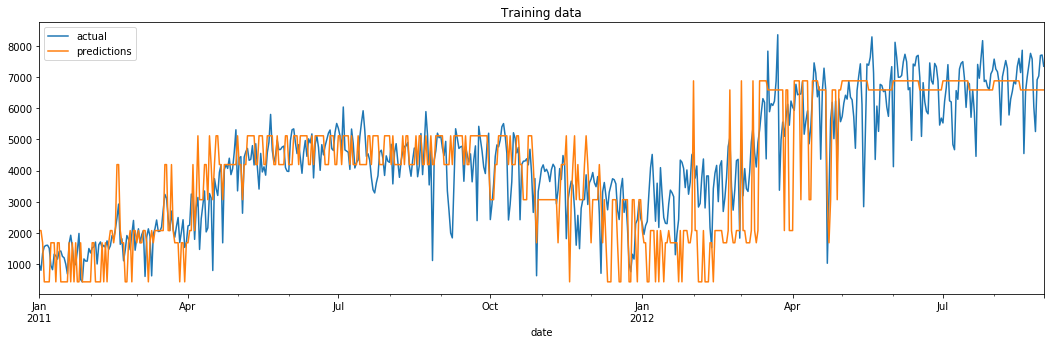

In [100]:
create_plot(train_df, tree, title="Training data")

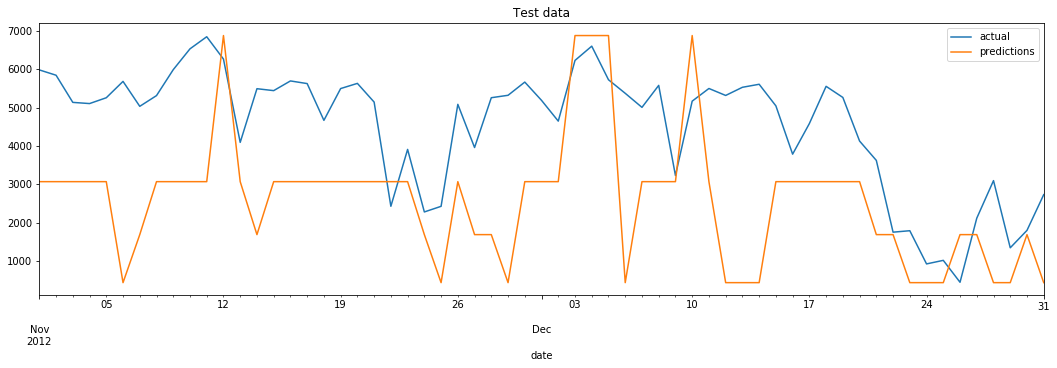

In [101]:
create_plot(test_df, tree, title="Test data")

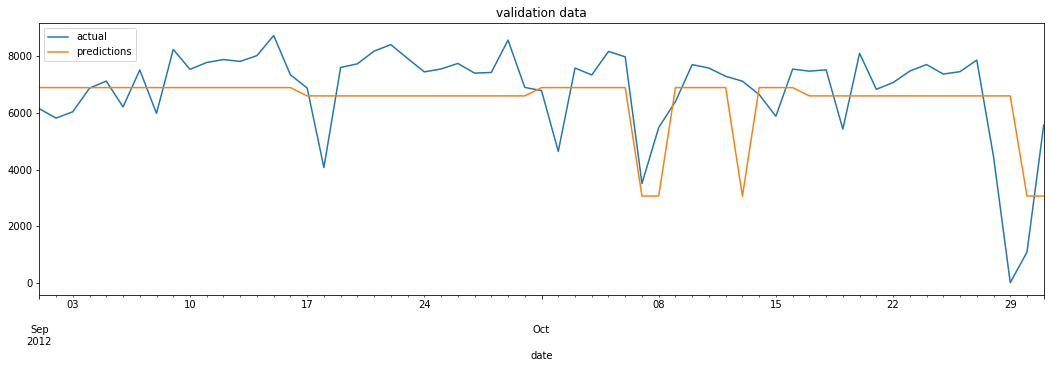

In [102]:
create_plot(val_df, tree, title="validation data")

# Titanic Data Set to perform classification using categorical data

In [166]:
df = pd.read_csv('titanic.csv')
df['label'] = df.Survived
df = df.drop(["PassengerId","Name","Ticket","Cabin",'Survived'],axis=1)

# handling missing values
median_age = df.Age.median()
mode_embarked = df.Embarked.mode()[0]

df = df.fillna({'Age':median_age,'Embarked':mode_embarked})

In [173]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [174]:
#random.seed(0)
train_df, test_df = train_test_split(df , test_size=20)
tree = decision_tree_algorithm(train_df, max_depths=10)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree, width=50)
print(accuracy)

{'Sex = male': [{'Fare <= 26.25': [{'Age <= 12.0': [{'SibSp = 1': [1,
                                                                   {'Fare <= 12.475': [1,
                                                                                       {'Parch = 2': [1,
                                                                                                      0]}]}]},
                                                    {'Embarked = C': [{'Fare <= 15.05': [{'Age <= 29.0': [{'Age <= 28.5': [{'Age <= 22.0': [{'Parch = 1': [0,
                                                                                                                                                           {'Fare <= 4.0125': [0,
                                                                                                                                                                               1]}]},
                                                                                                          

# Bike Rental dataset to perform Regression

In [75]:
df = pd.read_csv('bike_rentals.csv')
df = pd.read_csv('bike_rentals.csv',usecols=range(1, (len(df.columns))), parse_dates=['dteday'])
df = df.drop(["casual", "registered"],axis=1)
df = df.rename({"dteday":'date'},axis=1)
df.head()

,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [76]:
date_column = df.date

df["day_of_year"] = date_column.dt.dayofyear
df["day_of_month"] = date_column.dt.day

df["quarter"] = date_column.dt.quarter
df["week"] = date_column.dt.week

df["is_month_end"] = date_column.dt.is_month_end
df["is_month_start"] = date_column.dt.is_month_start
df["is_quarter_end"] = date_column.dt.is_quarter_end
df["is_quarter_start"] = date_column.dt.is_quarter_start
df["is_year_end"] = date_column.dt.is_year_end
df["is_year_start"] = date_column.dt.is_year_start


df = df.set_index("date")

In [77]:
df["label"] = df.cnt
df = df.drop(["cnt"],axis=1)

In [78]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,day_of_month,quarter,week,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,label
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,...,1,1,52,False,True,False,True,False,True,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,...,2,1,52,False,False,False,False,False,False,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,...,3,1,1,False,False,False,False,False,False,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,...,4,1,1,False,False,False,False,False,False,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,...,5,1,1,False,False,False,False,False,False,1600


In [79]:
data = df.values

In [80]:
train_df,test_df=train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df,ml_task="regression", max_depths=3)
pprint(tree)

{'temp <= 0.43083299999999997': [{'hum <= 0.58625': [{'day_of_year <= 67': [822,
                                                                            2425]},
                                                     {'atemp <= 0.34152899999999997': [1096,
                                                                                       2077]}]},
                                 {'yr = 1': [{'day_of_year <= 201': [6591,
                                                                     6824]},
                                             {'windspeed <= 0.175379': [1817,
                                                                        4195]}]}]}


### Train Test split and Validation

In [93]:
train_df = df.iloc[:-122]
val_df = df.iloc[-122:-61]  # Sep and Oct of 2012
test_df = df.iloc[-61:]     # Nov and Dec of 2012

